#### **Deep Learining** is a subset of machine learning that uses Artificial nerural networks with multiple hidden layers and help to learn complex patterns from large amoun of Data
#### **Types** : ANN , CNN, RNN
### **CNN (Convolutional Neural Networks)** : is deep learning model many used for images and videos
**Use Cases**:
* Image Classification (Pizza or Steak)
* Face Recognition
* Medical Imaging
* Video Classification (action detection, surveillance)
* Self Driving Cars


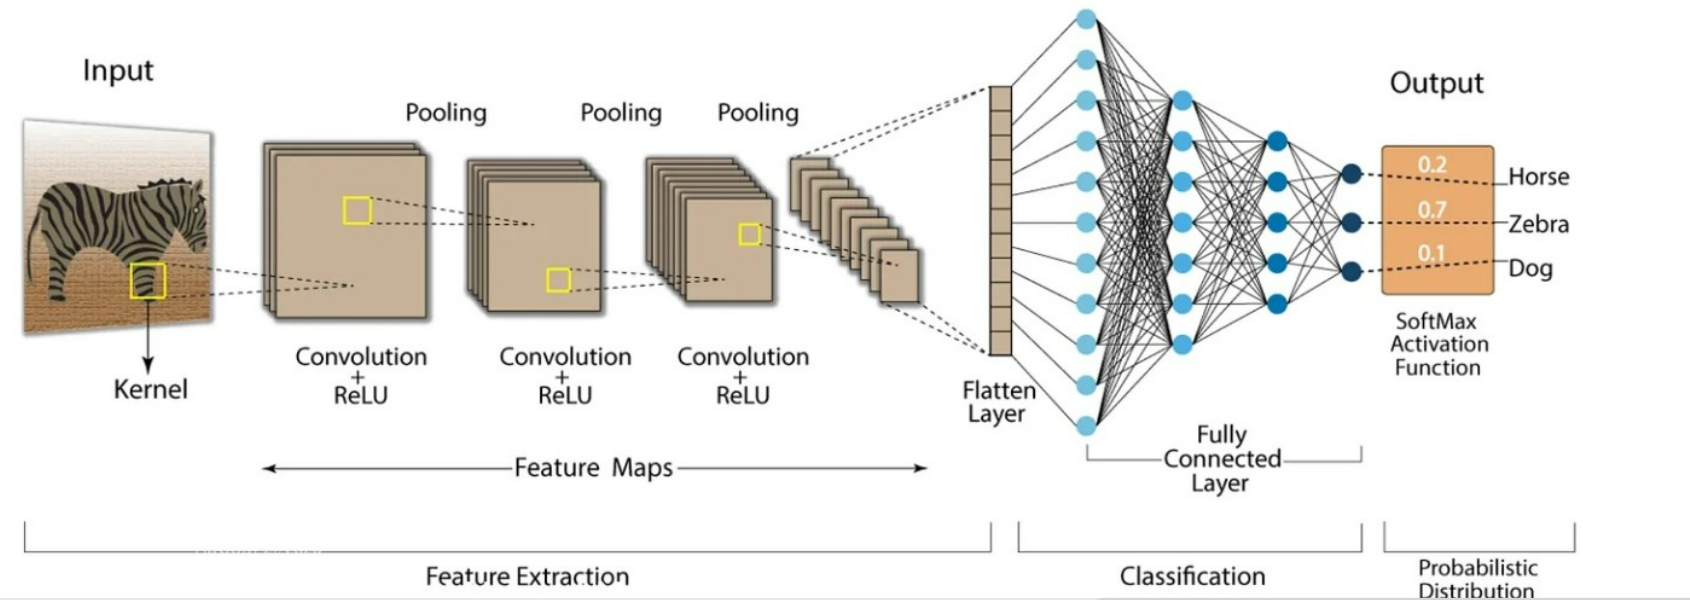

* 1. Convolutional Layer: Detect Edges and Patterns
* 2. ReLu: Keep Positive Values
* 3. Pooling: Reduce Imaze Size
* 4. Flatten Layer: Converts to 1D
* 5. Dense Layer: Final Decision for exmaple in above image(0.2 Hors,o.1-Dog,0.7 Zebra)

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_loader
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 1.56GB/s]
100% 163M/163M [00:00<00:00, 1.52GB/s]


In [4]:
with zipfile.ZipFile('/content/face-mask-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [5]:
base_dir='data'
os.listdir(base_dir)

['with_mask', 'without_mask']

In [6]:
tf.random.set_seed(42)

In [7]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [8]:
training_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,class_mode='binary',subset='training')

Found 6043 images belonging to 2 classes.


In [9]:
testing_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 1510 images belonging to 2 classes.


In [10]:
# Create Model and Layers
model=Sequential(
    [     Input(shape=(224,224,3)),
        Conv2D(16,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.3),
        Dense(1,activation='sigmoid')
    ]
)

In [11]:
model.summary() #model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,561,633 (21.22 MB)

 Trainable params: 5,561,633 (21.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Comple
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#Training
history=model.fit(training_data,epochs=10,validation_data=testing_data)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/189 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.7238 - loss: 0.5502

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.7695 - loss: 0.4752 - val_accuracy: 0.9358 - val_loss: 0.2087
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9142 - loss: 0.2234 - val_accuracy: 0.9245 - val_loss: 0.2376
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9347 - loss: 0.1765 - val_accuracy: 0.9146 - val_loss: 0.2396
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9537 - loss: 0.1363 - val_accuracy: 0.8841 - val_loss: 0.3547
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9666 - loss: 0.0892 - val_accuracy: 0.9477 - val_loss: 0.1899
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9794 - loss: 0.0630 - val_accuracy: 0.9483 - val_loss: 0.1944
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9802 - loss: 0.0560 - val_accuracy: 0.9576 - val_loss: 0.1903
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9866 - loss: 0.0405 - val_accura

In [14]:
# Evaluate
loss,accuracy=model.evaluate(testing_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9491 - loss: 0.2605
Loss: 0.2733505368232727
Accuracy: 0.9476821422576904


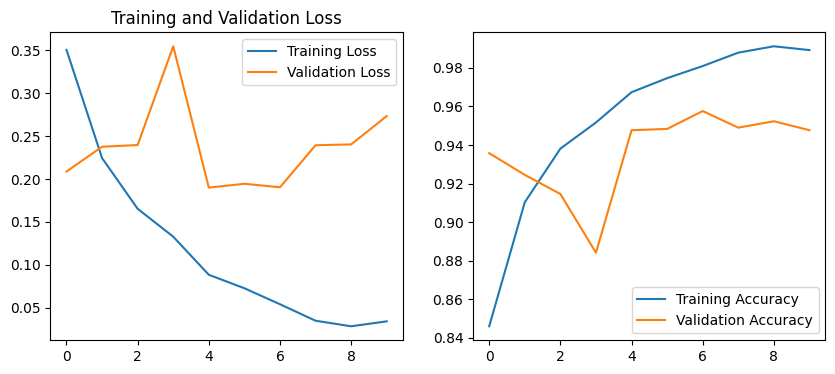

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


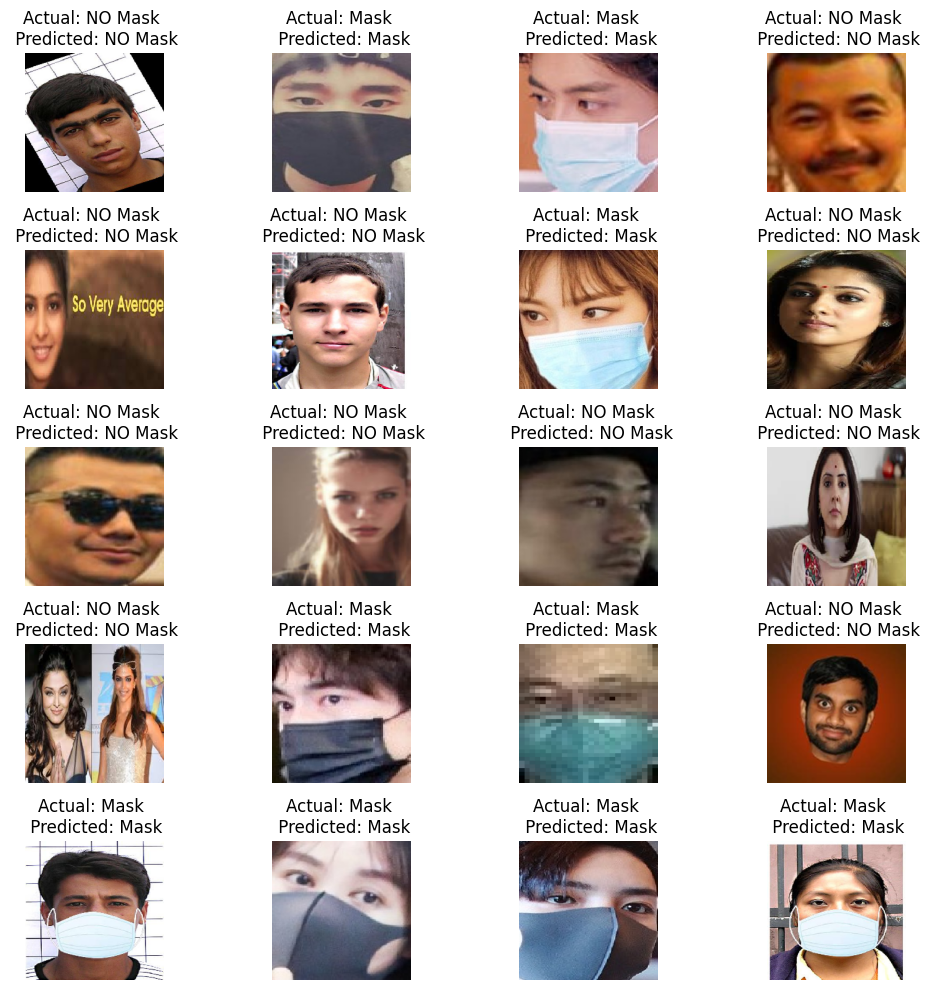

In [20]:
#Prediction
image,label=next(testing_data)
prediction=model.predict(image)
plt.figure(figsize=(12,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(image[i])
  plt.axis('off')
  true_label='NO Mask' if label[i]==1 else 'Mask'
  pred_label='NO Mask' if prediction[i]>0.5 else 'Mask'
  plt.title(f'Actual: {true_label} \n Predicted: {pred_label}')
  plt.tight_layout()
plt.show()

Saving g1.jpg to g1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Mask
Probability: 0.9999999403953552


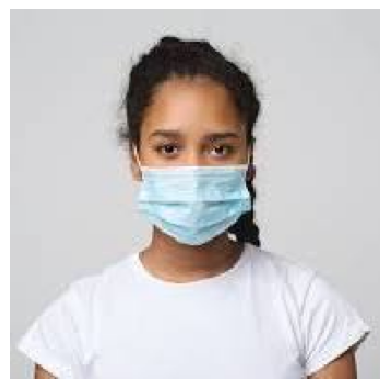

In [32]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path='/content/'+fn
  img=image_loader.load_img(img_path,target_size=(224,224))
  img_array=image_loader.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array/=255.0
  prediction=model.predict(img_array)[0][0]
  if prediction>0.5:
    print(f'Prediction: No Mask')
    print(f'Probability: {prediction}')
  else:
    print(f'Prediction: Mask')
    print(f'Probability: {1-prediction}')
  plt.imshow(img)
  plt.axis('off')
  plt.show()